In [1]:
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image

In [3]:
from collections import Counter
from sklearn.cluster import KMeans
from matplotlib import colors
import cv2

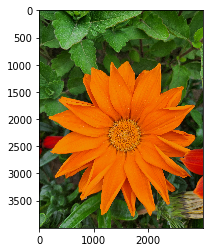

In [6]:
image = cv2.imread('20230504_094537.jpg')
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)
plt.imshow(image)

In [17]:
class color_pick_cmap() :
    
    def __init__(self):
        print("started!!")
        self.modified_img = None
        """pre declation for easy code reading"""
        
        
    def prep_image(self, raw_img):
        #modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
        self.modified_img = raw_img
        self.modified_img = self.modified_img.reshape(self.modified_img.shape[0]*self.modified_img.shape[1], 3)
        
    def rgb_to_hex(self, rgb_color):
        hex_color = "#"
        for i in rgb_color:
            i = int(i)
            hex_color += ("{:02x}".format(i))
        return hex_color       

    def color_analysis(self):
        self.clf = KMeans(n_clusters = 5)
        self.color_labels = self.clf.fit_predict(self.modified_img)
        self.center_colors = self.clf.cluster_centers_
        self.counts = Counter(self.color_labels)
        ordered_colors = [self.center_colors[i] for i in self.counts.keys()]
        self.hex_colors = [rgb_to_hex(ordered_colors[i]) for i in self.counts.keys()]
       
    def draw_pie(self):
        plt.figure(figsize = (12, 8))
        plt.pie(self.counts.values(), labels = self.hex_colors, colors = self.hex_colors)
        plt.savefig("color_analysis_report.png")
        print(hex_colors)

In [18]:
color_picker = color_pick_cmap()

started!!


In [21]:
color_picker.prep_image(image)
color_picker.color_analysis()

In [7]:
def rgb_to_hex(rgb_color):
    hex_color = "#"
    for i in rgb_color:
        i = int(i)
        hex_color += ("{:02x}".format(i))
    return hex_color

def prep_image(raw_img):
    #modified_img = cv2.resize(raw_img, (900, 600), interpolation = cv2.INTER_AREA)
    modified_img = raw_img
    modified_img = modified_img.reshape(modified_img.shape[0]*modified_img.shape[1], 3)
    return modified_img

def color_analysis(img):
    clf = KMeans(n_clusters = 5)
    color_labels = clf.fit_predict(img)
    center_colors = clf.cluster_centers_
    counts = Counter(color_labels)
    ordered_colors = [center_colors[i] for i in counts.keys()]
    hex_colors = [rgb_to_hex(ordered_colors[i]) for i in counts.keys()]
    plt.figure(figsize = (12, 8))
    plt.pie(counts.values(), labels = hex_colors, colors = hex_colors)
    plt.savefig("color_analysis_report.png")
    print(hex_colors)


['#3c6421', '#22330e', '#ed6d02', '#bf3803', '#68904e']


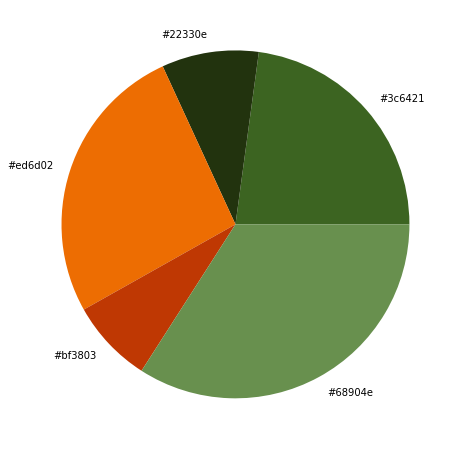

In [8]:
modified_image = prep_image(image)
color_analysis(modified_image)